# 1. Descripción del problema

El problema a tratar por este algoritmo continúa siendo el **problema de ordenamiento**, que consiste en modificar una secuencia de números para que luego de aplicado el algoritmo, los mismos elementos de la secuencia se encuentren en un orden específico. Por ejemplo ordenar los números de un arreglo de menor a mayor o viceversa.

**Entrada:** Secuencia de *n* números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

**Tamaño del problema:** El tamaño para este problema viende definido por la cantidad *n* de valores a ordenar.


<a href="https://imgur.com/XWBpqxt"><img src="https://i.imgur.com/XWBpqxt.jpg" title="source: imgur.com" /></a>

La diferencia de este algoritmo con el Insretion Sort es la forma de solucionar el mismo problema, lo cual se explicará en la siguiente sección.

# 2. Merge Sort


## 2.1 Código

In [92]:
Contador1 = 0 #Contador de llamadas recursivas
Contador2 = 0 #Contador de comparaciones

def MergeSort(array, verbose = False):
	global Contador1

	if (len(array) <= 1): #Caso base: si el tamaño del arreglo es 0 o 1 retorna el arreglo tal cual pues ya está ordenado
		Contador1 += 1
		return array
 
 	#Se divide el arreglo original en dos mitades y se les aplica Merge Sort de manera recursiva
	medio = len(array) // 2
	der = MergeSort((array[:medio]), verbose)
	Contador1 += 1
	izq = MergeSort((array[medio:]), verbose)
	Contador1 += 1

	return Merge(der, izq, verbose)  #Se juntan ambos arreglos

def Merge(A, B, verbose):
	#Variables auxiliares para recorrer sub-arreglos
	i = 0
	j = 0
	global Contador2
	C = []

	if(verbose == True):
		print("Arreglo izquierdo: " + "\033[33m" + str(A))
		print("\033[0m")
		
		print("Arreglo derecho: " + "\033[31m" + str(B))
		print("\033[0m")
	
	while(i < len(A) and j < len(B)):  #Se va insertando el menor elemento de cada sub arreglo en el arreglo combinado
		Contador2 += 1
		if(A[i] < B[j]):
			C.append(A[i])
			i+=1
		else:
			C.append(B[j])
			j+=1
		
	#Se agregan todos los elementos restantes de los sub-arreglos
	C += A[i:]
	Contador2 += len(A[i:])
	C += B[j:]
	Contador2 += len(B[j:])

	if verbose == True:
		print("Arreglo resultante: " + "\033[34m" + str(C))
		print("\033[0m")

	return C  #Se juntan ambos arreglos


#Ejemplo
A = [4,5,6,3,7,9,1]
verbose = False

if(verbose == True):
	print("Entrada: " + "\033[31m" + str(A))
	print("\033[0m")
else:
	print("Entrada: ", A)
 
Contador1 = 0 #Contador de llamadas recursivas
Contador2 = 0 #Contador de comparaciones
A = MergeSort(A, verbose)

if(verbose == True):
	print("Salida: " + "\033[92m" + str(A))
	print("\033[0m")
else:
	print("Salida: ", A)
	print("Numeros de comparaciones: ", Contador2)
	print("Numeros de llamadas recursivas: ", Contador1)

Entrada:  [4, 5, 6, 3, 7, 9, 1]
Salida:  [1, 3, 4, 5, 6, 7, 9]
Numeros de comparaciones:  20
Numeros de llamadas recursivas:  19


## 2.2 Descripción



El algoritmo de Merge Sort consiste en el ordenamiento de un arreglo o lista de números mediante el uso del diseño **divide y vencerás**, el cual se explicará a continuación de la entrada y salida del algoritmo.

**Entrada:** Un arreglo o lista con n cantidad de números.

**Salida:** El mismo arreglo con exactamente los mismos elementos pero ordenados de menor a mayor.

El funcionamiento mencionado anteriormente se consigue gracias a el principio anteriormente mencionado **"divide y vencerás"**, el cual se hizo famoso debido a que era la técnica que utilizaba el imperio romano para ganar sus batallas. Sin embargo su uso se fue masificando al punto en que se utiliza para cualquier situación en la cual conviene dividir un problema inicial en sub-problemas que sean más llevaderos o "fáciles" de solucionar, para así llegar a un resultado final. 

Este algoritmo lleva a cabo lo anterior realizando los siguientes tres pasos:

1. Se divide el arreglo de $n$ elementos en dos que contengan $n/2$ elementos.

2. Ordena cada sub-arreglo utilizando en cada uno  y de manera recursiva el algoritmo Merge Sort.

3. Utiliza una función ***merge*** la cual se encarga de combinar ambos sub-arreglos y dar como resultado el nuevo arreglo con los mismos $n$ elementos pero de manera ordenada.

## 2.3 Ejemplo

En la siguiente imagen se iluistrará y luego se explicará un ejemplo del uso de Merge Sort para el arreglo `A = [4, 5, 6, 3, 7, 9, 1]`:

<a href="https://imgur.com/EyB8kK6"><img src="https://i.imgur.com/EyB8kK6.jpg" title="source: imgur.com" /></a>

* **Paso 1:** En este paso se puede apreciar que el arreglo se divide a la mitad. Debido a que es un arreglo de tamaño 7, los sub-arreglos resultantes son de tamaño 3 y 4 respectivamente.

* **Paso 2:** Para este paso cada sub-arreglo es dividido en dos también, para el sub-arreglo de la izquierda, de tamaño tres, dan como resultado dos sub- arreglos de tamaño 2 y 1. Mientras que para el de la derecha, quedan dos de 2 elementos cada uno.

* **Paso 3:** En este siguiente paso se consigue el primer objetivo principal del Merge Sort, dividir a la mínima capacidad el problema, teniendo finalmnente 7 arreglos de tamaño 1, el cual contiene cada componente del arreglo original.

* **Paso 4:** En el paso cuatro es que comienza a funcionar la función ***Merge***, la cual es la encargada de comparar y combinar los componentes de cada sub-arreglo, determinando cuál es el menor de ellos y en base a eso otorgarles una nueva posición en el arreglo resultante.

* **Paso 5:** Para este paso es importante observar que los sub arreglos contienen los mismos números que los del paso 2, con la característica que ahora se encuentran ordenados de menor a mayor.

* **Paso 6:** En el paso final es que se puede observar cómo queda el arreglo resultante después de aplicar el Merge Sort, teniendo los mismos elementos que el arreglo original pero ordenados de menor a mayor.

## 2.4 Ejecución del código con opción verbose

In [93]:
import random

A = random.sample(range(1, 100), 7)
verbose = True

if(verbose == True):
	print("Entrada: " + "\033[31m" + str(A))
	print("\033[0m")
else:
	print("Entrada: ", A)

Contador1 = 0
Contador2 = 0
A = MergeSort(A, verbose)

if(verbose == True):
	print("Entrada: " + "\033[92m" + str(A))
	print("\033[0m")
else:
	print("Entrada: ", A)
 
print("Llamadas a Merge Sort: ", Contador1)
print("Comparaciones en Merge: ", Contador2)

Entrada: [12, 3, 66, 42, 38, 68, 23]

Arreglo izquierdo: [3]

Arreglo derecho: [66]

Arreglo resultante: [3, 66]

Arreglo izquierdo: [12]

Arreglo derecho: [3, 66]

Arreglo resultante: [3, 12, 66]

Arreglo izquierdo: [42]

Arreglo derecho: [38]

Arreglo resultante: [38, 42]

Arreglo izquierdo: [68]

Arreglo derecho: [23]

Arreglo resultante: [23, 68]

Arreglo izquierdo: [38, 42]

Arreglo derecho: [23, 68]

Arreglo resultante: [23, 38, 42, 68]

Arreglo izquierdo: [3, 12, 66]

Arreglo derecho: [23, 38, 42, 68]

Arreglo resultante: [3, 12, 23, 38, 42, 66, 68]

Entrada: [3, 12, 23, 38, 42, 66, 68]

Llamadas a Merge Sort:  19
Comparaciones en Merge:  20


Las impresiones en caso de que la opción verbose esté activada ilustran lo que va sucediendo con el arreglo luego de separarlo en arreglos unitarios. Básicamente se muestra la formación progresiva de arreglos de mayor tamaño en los cuales se encuentren con los elementos de los sub-arreglos originales pero con el orden requerido. Mostrando así los elementos a juntar en colores amarillo y rojo respectivamente, seguido por el arreglo resultante del Merge luego de cada paso.

# 3. Propidades del algoritmo

## 3.1Tiempo de ejecución

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este según su entrada, por lo que tenemos la siguiente representación:

\begin{equation}
T(n) = \begin{cases}
  O(1)  & N \text{es 1} \\
  2T(n/2) + O(n) & \text{N mayores a 1}
\end{cases}
\end{equation}

Lo que quiere decir esto es que Merge Sort se comporta de dos maneras dependiendo del tamaño de su entrada. Por un lado si el arreglo a ordenar es de tamaño 1, se retorna el mismo arreglo, lo cual tiene una complejidad constante $O(1)$. Para todos los otros casos, el algoritmo al ser recursivo crea dos arreglos de tamaño $n \above 1pt 2$ a los cuales se les aplicará también el mismo algoritmo, estos se combinarán mediante la función Merge que tiene una complejidad lineal $O(n)$, mientras que el hecho de la división del arreglo en dos tiene también una complejidad $O(1)$.

Bajo esta primicia se puede aramar un árbol de recursión para calcular el tiempo de ejecución, el cual quedaría de la siguiente manera.

<a href="https://imgur.com/QELlsUO"><img src="https://i.imgur.com/QELlsUO.jpg" title="source: imgur.com" /></a>

Se observa que por cada nivel, la suma de las complejidades temporales viene dada por el *Merge* de los componentes, por lo cual el resultado para cada nivel siempre es $n$. Teniendo lo anterior en cuenta, se debe multiplicar la complejidad de cada nivel por la altura del árbol, el cual al ser binario corresponde a $\log_{2}(n)$. Realizando la operación correspondiente tenemos que la complejidad temporal para el algoritmo Merge Sort corresponde a $O(n \log(n))$.

## 3.2 Correctitud

### **3.2.1 Teorema  de correctitud de función Merge**

El algoritmo Merge, luego de ser aplicado en dos sub-arreglos del orden $[a_1,a_2, \ldots ,a_n]$ y $[b_1,b_2, \ldots ,b_n]$ , genera un nuevo arreglo $[a_1',a_2', \ldots ,a_n']$ el cual cumple las condiciones de tener los mismos elementos de los sub-arreglos y estar ordenado de **menor a mayor**, es decir $a_1' \leq a_2' \leq \ldots \leq a_n'$ 

### **Prueba del teorema**

* **Propiedad invariante de bucle**: En cada iteración, se tienen i elementos ordenados pertenecientes al arreglo resultante, los cuales corresponden a los menores elementos de los sub arreglos originales.

**Inicialización**

Para la primera iteración, los sub arreglos que se utilizan para hacer el merge contienen solo un elemento cada uno, por lo que trivialmente están ordenados y son los elementos de menor valor de los respectivos sub arreglos originales, estos son los elementos que compondrán entonces al arreglo resultante.

* **Imagen de explicación de la inicialización:**

<a href="https://imgur.com/DbtksQc"><img src="https://i.imgur.com/DbtksQc.jpg" title="source: imgur.com" /></a>

**Mantención**

Para la mantención se debe analizar lo que ocurre con la i-ésima iteración. En este caso, se asume que los dos sub-arreglos ya están ordenados. Teniéndo en cuenta esto, se recorre cada sub-arreglo, y los elementos de cada uno se comparan, determinando en base a esto sus nuevas posiciones en el arreglo resultante, de esta manera, se asegura que en el nuevo arreglo se insertarán de menor a mayor y por consiguiente el arreglo generado también estará ordenado.

* **Imagen de explicación de la mantención:**

<a href="https://imgur.com/0GAh6ke"><img src="https://i.imgur.com/0GAh6ke.jpg" title="source: imgur.com" /></a>

En la anterior imagen podemos ver que los sub-arreglos A y B que están previametne ordenados se recorren desde el inicio hasta el final, comparando así sus elementos para luego ser insertados en el nuevo arreglo ordenado.

Nótese que si por ejemplo, se llegase a insertar el último elemento de A, el resto de elementos en B que quedaron por comparar se agregarán automáticamente al final de C.

Al comprobar que esta propiedad se cumple al inicio del algoritmo y durante la iteración *i-ésima*, se asume que para el último elemento la propiedad **invariante del bucle** se sigue cumpliendo y por ende queda demostrada.



### **3.2.2 Teorema  de correctitud de algoritmo Merge Sort**

El algoritmo Merge Sort, luego de ser aplicado en un arreglo del orden $[a_1,a_2, \ldots ,a_n]$, genera un nuevo arreglo $[a_1',a_2', \ldots ,a_n']$ el cual cumple las condiciones de tener los mismos elementos del arreglo original, pero ordenados de **menor a mayor**, es decir $a_1' \leq a_2' \leq \ldots \leq a_n'$ 

### **Prueba del teorema**

Debido a que Merge Sort es un algoritmo recursivo, para la prueba de este segundo teorema se hará uso del método de inducción matemática, el cual consiste en demostrar que una propoisición $P(n)$ se cumple para todos los números $n$. Para esto se deben aplicar los siguientes puntos:

1. Probar que $P(n)$ se cumple para un caso base.
2. Probar que si $P(k)$ es verdadera, entonces también se cumple para $P(k+1)$

### **Caso base**

El caso base es para cuando $n=1$, es decir Merge Sort se aplica para un arreglo con tan solo un elemento, en este caso el algoritmo retorna el mismo arreglo con su elemento y este por ende se encuentra ordenado, el algoritmo entonces funciona correctamente.

### **Paso inductivo**

Para este caso se asume que la propiedad de Merge Sort se cumple para todos los elementos menores o iguales a $k$. Luego observamos que para una entrada $k+1$, tenemos que el algoritmo genera dos sub-arreglos de tamaño $k+1 \above 1pt 2$ cada uno. Teniendo en cuenta lo mencionado al principio del paso inductivo y gracias a que $k+1 \above 1pt 2$ $\leq k$, se puede asegurar que la propiedad se cumple también para $k+1$.

Es importante recalcar que el algoritmo Merge Sort hace uso de la función Merge, de la cual su correctitud ya ha sido comprobada. Esta es finalmente la que junta ambos sub-arreglos ordenados en uno solo con los elementos del arreglo original, completando así la correctitud del algoritmo.

# 4. Experimentos

In [94]:
def insertionSort(array, verbose = False): #Argumentos: El arreglo a ordenar + opción verbose para ver el paso a paso
  if verbose == True:
    print("\n")

  comp = 0 #comparaciones
  permut = 0 #permutaciones

  for i in range (1,len(array)): #Ciclo más grande, es el que realiza cada paso del algoritmo
    key = array[i] #Se guarda número a ubicar
    j = i-1

    if verbose == True:
      print("Pasada", i)
      print("arreglo al inicio:", array)
      print("Número a posicionar:", array[i])

    while 1:
      comp += 1
      if j >= 0 and key < array[j]:
        permut+=1
        #Si el número es mayor al de su izquierda, se intercambian de posición entre ellos
        array[j+1] = array[j]
        array[j] = key
        j-=1 #Se modifica variable j para seguir recorriendo el arreglo hacia la izquierda hasta llegar a la posición 0
      else:
        break #De no ser necesario una permutación, se sigue avanzando para el siguiente número
    
    if verbose == True:
      print("Partes ordenadas del arreglo luego de permutar:")
      print("[", end = '')

      for k in range(0, i): #Coloreado del arreglo para una mejor comprensión de este
        print("\033[92m" + str(array[k]) + ", ", end = '')
      for l in range(i, len(array)):
        if(l != len(array)-1):
          print("\033[0m" + str(array[l]) + ", ", end = '')
        else:
          print("\033[0m" + str(array[l]), end = '')

      print("]\n")

  return comp, permut

## 4.1 Mejor y peor caso

Para el primer experimento, se estudiarán la cantidad de comparaciones realizadas en el mejor y peor caso posible para el algoritmo.

Es importante recalcar que el mejor caso de este algoritmo y el peor caso son de cierta forma "relativos", ya que ambos tienen exactamente la misma complejidad $O(n \log(n))$. Esto es debido a que en ambos casos el algoritmo desarma el arreglo y luego lo vuelve a combinar comparando los elementos entre sí, no existe una comprobación de orden previa a la división.

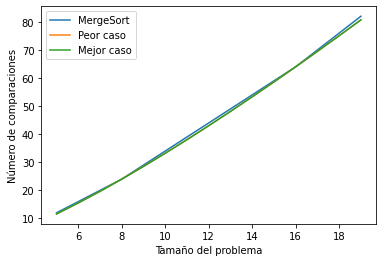

In [95]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,20)] 
y1=[(n * math.log2(n)) for n in range(5,20)] # worst case
y2=[(n * math.log2(n)) for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  Contador2 = 0
  a = MergeSort(a)
  y.append(Contador2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso", "Mejor caso"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de comparaciones')
plt.show()

## 4.2 Comparación con Insertion Sort

### **Análisis de resultados**

Para la primera gráfica se muestra la relación entre el tamaño $n$ del problema y la cantidad de comparaciones realizadas por el algoritmo, junto con las comparaciones calculadas de forma matemática para mejor y el peor caso. Como se mencionó anteriormente, el mejor y peor caso comparten la misma complejidad temporal por lo cual su gráfica es la misma. Por otro lado el Merge Sort implementado en este informe se acerca bastante a las estimaciones correspondientes, lo cual ayuda a reafirmar el correcto funcionamiento del algoritmo.

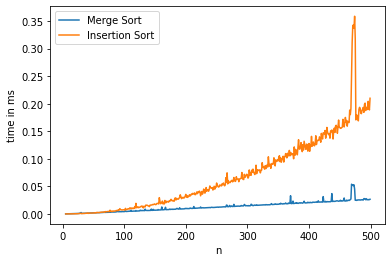

In [91]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x = []; y1 = [] ; y2 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  k = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)

  x.append(n)
  y1.append(k)
  y2.append(t)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Merge Sort", "Insertion Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Luego de analizar ambos gráficos, se puede ver que a pesar de ciertos picos de rendimiento (los cuales luego de varias ejeciones del mismo código se llegó a la conclusión que se debía a anomalías del procesador), el algoritmo Merge Sort presenta un crecimiento más lento a comparación del Insertion Sort dependiendo del tamaño del problema. Luego en tamaños muy grandes el Insertion Sort se comporta mucho más lento que el Merge Sort.

Lo anteriormente descrito se podría considerar dentro de lo esperable debido a las complejidades temporales teóricas de ambos algoritmos ($O(n^2)$ para el Insertion y $O(n\log(n))$ para el Merge). Siendo el Merge Sort el de menor requerimiento en tiempo, y el más estable a lo largo de las pruebas, debido a que presenta una menor cantidad de fluctuaciones a lo largo de su gráfica a comparación del Insertion Sort.